In [1]:
import torch
import torchvision
import math
from torchvision import datasets, transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
device = torch.device("cuda")
transform = transforms.Compose([transforms.ToTensor()])
mnist_train = datasets.MNIST(root = "./data",train = True, download = True, transform= transform)
mnist_test = datasets.MNIST(root="./data", train = False, download = True, transform = transform)
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size = 200, shuffle = True)
test_loader = torch.utils.data.DataLoader(mnist_test,batch_size=200,shuffle=False)


In [ ]:
class LM(nn.Module):
    def __init__(self,in_dim,out_dim=10):
        super().__init__()
        self.layer1 = nn.Linear(in_dim,out_dim)
    
    def forward(self,x):
        x = self.layer1(x)
       
        return x
    
    def train_loop(self,lr,nb_epochs):
        
        optimizer = optim.Adam(self.parameters(), lr = lr)
        criterion = nn.CrossEntropyLoss()
        training_losses = []
        m_training_losses = []
        test_losses = []
        m_test_losses = []
        epochs = 0
        while epochs < nb_epochs : 
            self.train()
            for x,y in train_loader:
                x = x.view(x.size(0),-1).to(device)
                y = y.to(device)
                optimizer.zero_grad()
                out = self(x)
                t_loss = criterion(out,y)
                t_loss.backward()
                optimizer.step()
                training_losses.append(t_loss.item())
            m_training_losses.append(sum(training_losses)/len(training_losses))
            training_losses.clear()
            
            self.eval()
            with torch.no_grad():
                for x,y in test_loader:
                    x = x.view(x.size(0),-1).to(device)
                    y = y.to(device)
                    test_out = self(x)
                    test_loss = criterion(test_out,y)
                    test_losses.append(test_loss.item())
                m_test_losses.append(sum(test_losses)/len(test_losses))
                test_losses.clear()
                
            epochs +=1

        return m_training_losses,m_test_losses
    

class Shallow_MLP(nn.Module):
    def __init__(self,in_dim,hid_dim,out_dim=10):
        super().__init__()
        self.layer1 = nn.Linear(in_dim,hid_dim)
        self.layer2 = nn.Linear(hid_dim,out_dim)
        self.relu = nn.ReLU()

    def forward(self,x):
        x = self.relu(self.layer1(x))
        x = self.layer2(x)
        return x
    
    def train_loop(self,lr,nb_epochs):
        
        optimizer = optim.Adam(self.parameters(), lr = lr)
        criterion = nn.CrossEntropyLoss()
        training_losses = []
        m_training_losses = []
        test_losses = []
        m_test_losses = []
        epochs = 0
        while epochs <nb_epochs:
            self.train() 
            for x,y in train_loader:
                x = x.view(x.size(0),-1).to(device)
                y = y.to(device)
                optimizer.zero_grad()
                out = self(x)
                t_loss = criterion(out,y)
                t_loss.backward()
                optimizer.step()
                training_losses.append(t_loss.item())
            m_training_losses.append(sum(training_losses)/len(training_losses))
            training_losses.clear()
            
            self.eval()
            with torch.no_grad():
                for x,y in test_loader:
                    x = x.view(x.size(0),-1).to(device)
                    y = y.to(device)
                    test_out = self(x)
                    test_loss = criterion(test_out,y)
                    test_losses.append(test_loss.item())
                m_test_losses.append(sum(test_losses)/len(test_losses))
                test_losses.clear()
                
            epochs +=1

        return m_training_losses,m_test_losses
    


class DeepMLP(nn.Module):
    def __init__(self,in_dim,hid_dim1,hid_dim2,out_dim=10):
        super().__init__()
        self.layer1 = nn.Linear(in_dim,hid_dim1)
        self.layer2 = nn.Linear(hid_dim1,hid_dim2)
        self.layer3 = nn.Linear(hid_dim2,out_dim)
        self.relu = nn.ReLU()

    def forward(self,x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.layer3(x)

        return x
    
    def train_loop(self,lr,nb_epochs):  
        optimizer = optim.Adam(self.parameters(), lr = lr)
        criterion = nn.CrossEntropyLoss()
        training_losses = []
        m_training_losses = []
        test_losses = []
        m_test_losses = []
        epochs = 0
        while epochs <nb_epochs: 
            self.train()
            for x,y in train_loader:
                x = x.view(x.size(0),-1).to(device)
                y = y.to(device)
                optimizer.zero_grad()
                out = self(x)
                t_loss = criterion(out,y)
                t_loss.backward()
                optimizer.step()
                training_losses.append(t_loss.item())
            m_training_losses.append(sum(training_losses)/len(training_losses))
            training_losses.clear()
            
            self.eval()
            with torch.no_grad():
                for x,y in test_loader:
                    x = x.view(x.size(0),-1).to(device)
                    y = y.to(device)
                    test_out = self(x)
                    test_loss = criterion(test_out,y)
                    test_losses.append(test_loss.item())
                m_test_losses.append(sum(test_losses)/len(test_losses))
                test_losses.clear()
                
            epochs +=1

        return m_training_losses,m_test_losses

In [4]:
def losses_loop(my_model,lr):
    model = my_model.to(device)
    training_losses, mean_test_losses = model.train_loop(lr=lr,nb_epochs=100)
    return training_losses, mean_test_losses

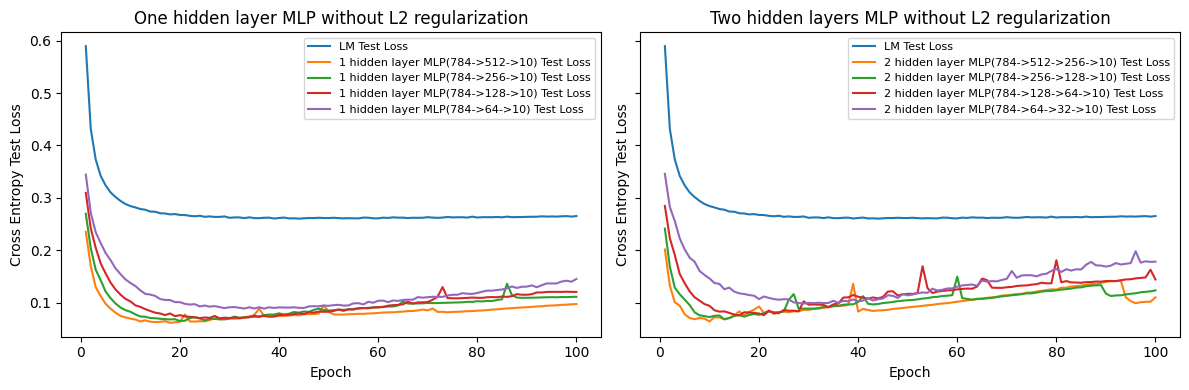

In [5]:
widths = [512,256,128,64]
lr = 5e-4
results_1hidden = {}
results_2hidden = {}

_, lm_test = losses_loop(LM(784,10),lr=lr)
for w in widths:
    _, test1 = losses_loop(Shallow_MLP(784,w,10), lr=lr)
    results_1hidden[w] = test1

    _, test2 = losses_loop(DeepMLP(784,w,w//2,10), lr=lr)
    results_2hidden[w] = test2


fig,axes = plt.subplots(1,2,figsize=(12,4), sharey=True)
ax = axes[0]
x = range(1,len(lm_test)+1)
ax.plot(x,lm_test,label = "LM Test Loss")
for w in widths:
    test1 = results_1hidden[w]
    ax.plot(range(1,len(test1)+1),test1,label = f"1 hidden layer MLP(784->{w}->10) Test Loss")
ax.set_title("One hidden layer MLP without L2 regularization")
ax.set_xlabel("Epoch")
ax.set_ylabel("Cross Entropy Test Loss")
ax.legend(fontsize=8)

ax = axes[1]
ax.plot(range(1,len(x)+1),lm_test,label = "LM Test Loss")
for w in widths:
    test2 = results_2hidden[w]
    ax.plot(range(1,len(test2)+1),test2, label = f"2 hidden layer MLP(784->{w}->{w//2}->10) Test Loss")
ax.set_title("Two hidden layers MLP without L2 regularization")
ax.set_xlabel("Epoch")
ax.set_ylabel("Cross Entropy Test Loss")
ax.legend(fontsize = 8)
plt.tight_layout()
plt.show()


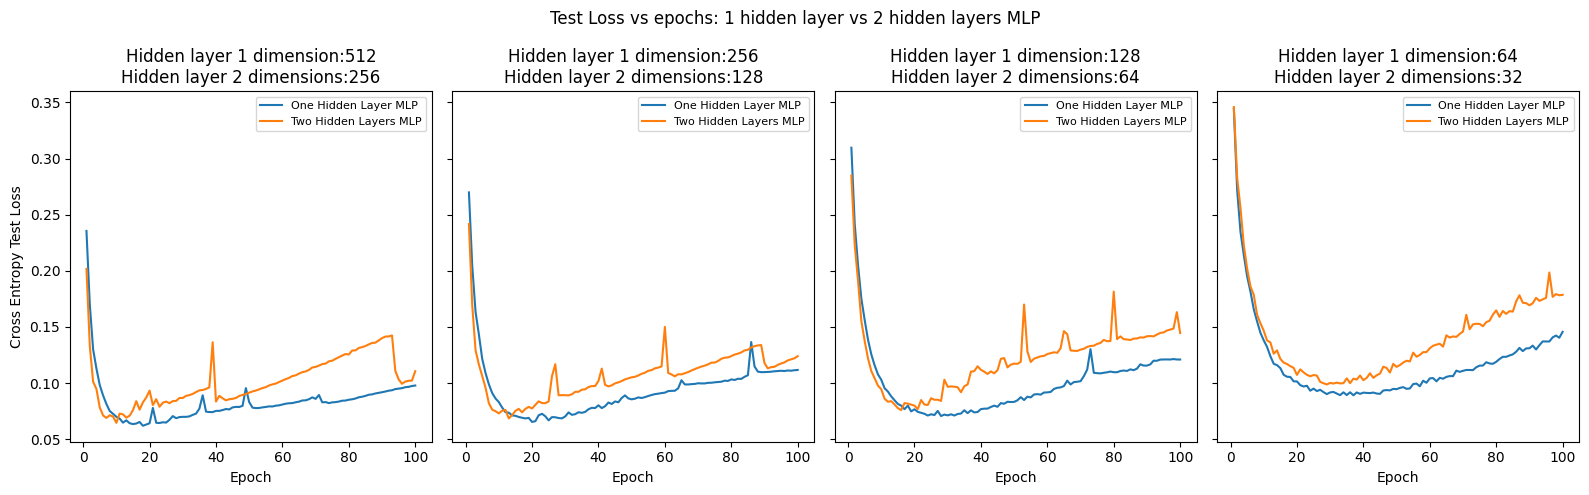

In [17]:
fig, axes = plt.subplots(1,4,figsize=(16,5),sharey=True)
fig.suptitle("Test Loss vs epochs: 1 hidden layer vs 2 hidden layers MLP")
for i,w in enumerate(widths):
    ax=axes[i]
    test1 = results_1hidden[w]
    test2 = results_2hidden[w]
    ax.plot(range(1,len(test1)+1),test1,label = "One Hidden Layer MLP")
    ax.plot(range(1,len(test2)+1),test2, label = "Two Hidden Layers MLP")
    ax.set_title(f"Hidden layer 1 dimension:{w}\nHidden layer 2 dimensions:{w//2}")
    ax.set_xlabel("Epoch")
    if i==0:
        ax.set_ylabel("Cross Entropy Test Loss")
    ax.legend(fontsize=8)

plt.tight_layout()
plt.show()

# Effect of L2 regularization on linear models


In [21]:
class LMreg(nn.Module):
    def __init__(self,in_dim=784,out_dim=10):
        super().__init__()
        self.layer1 = nn.Linear(in_dim,out_dim)
    
    def forward(self,x):
        return self.layer1(x)
    
    def train_loop_reg(self,lr,lambda_l2,nb_epochs):
        optimizer = optim.Adam(self.parameters(), lr=lr)
        criterion = nn.CrossEntropyLoss()
        
        epoch = 0
        while epoch < nb_epochs:
            self.train()
            for x,y in train_loader:
                x=x.view(x.size(0),-1).to(device)
                y=y.to(device)
                optimizer.zero_grad()
                out = self(x)
                ce = criterion(out,y)
                l2 = (self.layer1.weight**2).sum()
                t_loss = ce + lambda_l2 * l2
                t_loss.backward()
                optimizer.step()
            epoch += 1
        return self
    
    def get_weights(self):
        return self.layer1.weight.detach().cpu().view(-1,28,28)
        
    
no_reg = LMreg(784,10).to(device).train_loop_reg(5e-4,0,30)
low_reg = LMreg(784,10).to(device).train_loop_reg(5e-4,1e-4,30)
high_reg = LMreg(784,10).to(device).train_loop_reg(5e-4,1e-1,30)

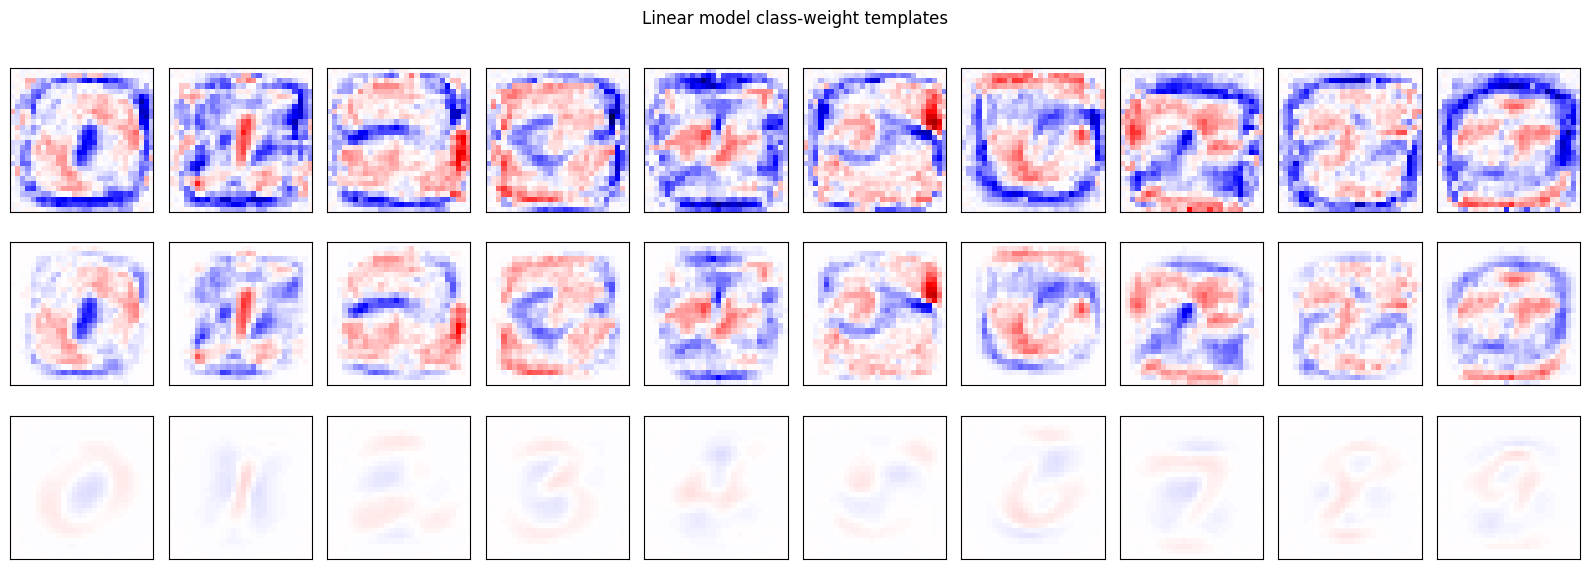

In [22]:
models = [no_reg, low_reg, high_reg]
Ws = [m.get_weights() for m in models]
fig, axes = plt.subplots(3,10, figsize = (16, 6))
max_abs = max(W.abs().max() for W in Ws)
for i in range(3):
    for j in range(10):
        img=Ws[i][j]
        ax = axes[i,j]
        ax.imshow(img, cmap = 'seismic',vmin = -max_abs, vmax = max_abs, interpolation="nearest")
        ax.set_xticks([]); ax.set_yticks([])

plt.suptitle("Linear model class-weight templates")
plt.tight_layout()
plt.show()

# Choosing the best performing MLP. Evaluation and Confusion Matrix

In [15]:
#I get the training and test losses for the one hidden layer MLP
min_cand1 = []
min_cand2 = []
epoch_cand1 = []
epoch_cand2 = []
for _ in range(5):
    candidate1 = Shallow_MLP(784,512,10).to(device)
    one_hidd_tr_loss, one_hidd_test_loss = candidate1.train_loop(5e-4,20)
    candidate2 = DeepMLP(784,512,256,10).to(device)
    two_hidd_tr_loss, two_hidd_test_loss = candidate2.train_loop(5e-4,20)
    min_cand1.append(min(one_hidd_test_loss))
    min_cand2.append(min(two_hidd_test_loss))
    idx1 = one_hidd_test_loss.index(min(one_hidd_test_loss))
    idx2 = two_hidd_test_loss.index(min(two_hidd_test_loss))
    epoch_cand1.append(idx1)
    epoch_cand2.append(idx2)

print(min_cand1,min_cand2,epoch_cand1,epoch_cand2)

[0.06132665267912671, 0.060903417287627236, 0.0633838708838448, 0.06159765882999636, 0.061575532233982815] [0.06372448010690278, 0.06802125954345684, 0.06529713131254539, 0.06334776061703451, 0.060336913620703855] [13, 15, 15, 15, 19] [10, 10, 7, 9, 7]


In [ ]:
min_cand1 = torch.tensor(min_cand1)
mean_cand1 = torch.mean(min_cand1)
std1 = torch.std(min_cand1)
print(mean_cand1,std1)
min_cand2 = torch.tensor(min_cand2)
mean_cand2 = torch.mean(min_cand2)
std2 = torch.std(min_cand2)
print(mean_cand2,std2)

In [27]:
#Based on my findings, I will select the one hidden layer model and train it for 15 epochs.
best_model = Shallow_MLP(784,512,10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(best_model.parameters(), lr = 5e-4)
confusion_matrix = torch.zeros(10,10,dtype=torch.int64)
epochs = 0 
while epochs < 15:
    best_model.train()
    for x,y in train_loader:
        x=x.view(x.size(0),-1).to(device)
        y=y.to(device)
        optimizer.zero_grad()
        out = best_model(x)
        loss = criterion(out,y)
        loss.backward()
        optimizer.step()
    epochs += 1

best_model.eval()
with torch.no_grad():
    for x,y in test_loader:
        x=x.view(x.size(0),-1).to(device)
        y = y.to(device)
        logits = best_model(x) #shape [200,10]
        preds = torch.argmax(logits,dim=1) #shape [200]
        for i in range(10):
            for j in range(10):
                confusion_matrix[i,j] += ((y==i) & (preds==j)).sum().cpu()
        






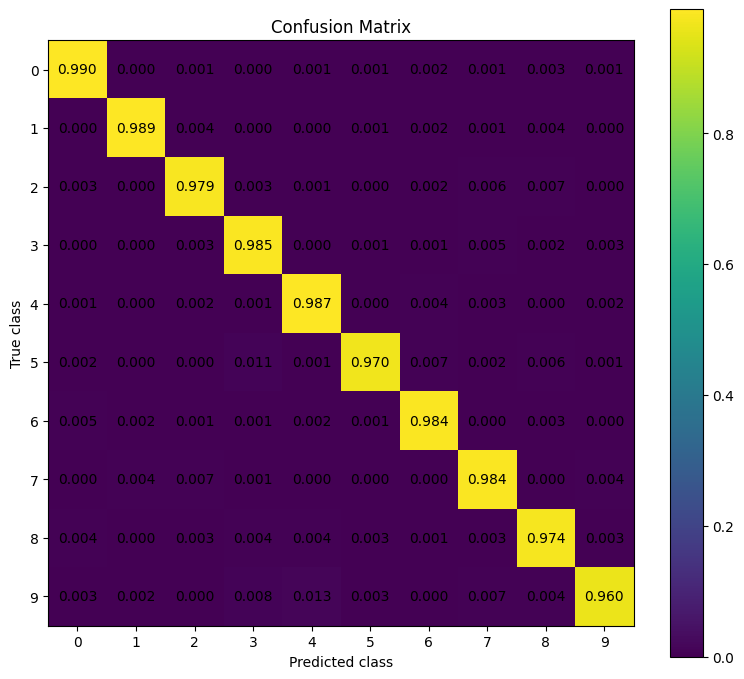

The model predicts the true class 98.05% of times


In [59]:

C = confusion_matrix
C = C.detach().cpu().float()
C_norm =  C / C.sum(axis=1,keepdim=True)
plt.figure(figsize=(8,7))
plt.imshow(C_norm, interpolation="nearest")
plt.title("Confusion Matrix")
plt.xlabel("Predicted class")
plt.ylabel("True class")
plt.xticks(range(10))
plt.yticks(range(10))
plt.colorbar()
for i in range(10):
    for j in range(10):
        plt.text(j, i, f"{C_norm[i,j].item():.3f}",
                 ha="center", va="center")
plt.tight_layout()
plt.show()

accurate_pred = 0
for i in range(10):
    accurate_pred += C[i,i].item()

accuracy = accurate_pred/C.sum().item()
print(f"The model predicts the true class {accuracy*100}% of times")


# Regularization and Overfitting on the One Hidden Layer MLP

In [3]:
class Shallow_MLP_reg(nn.Module):
    def __init__(self,in_dim=784,hid_dim=512,out_dim=10):
        super().__init__()
        self.layer1 = nn.Linear(in_dim,hid_dim)
        self.layer2 = nn.Linear(hid_dim,out_dim)
        self.relu = nn.ReLU()
    def forward(self,x):
        x =  self.relu(self.layer1(x))
        x = self.layer2(x)
        return x
    
    def train_loop_reg(self,lr,lambda_l2,nb_epochs):
        optimizer = optim.Adam(self.parameters(), lr=lr)
        criterion = nn.CrossEntropyLoss()
        training_losses ,m_training_losses , train_accuracies= [], [], []
        test_losses, m_test_losses, test_accuracies = [], [], []
        
        epoch = 0
        while epoch < nb_epochs:
            self.train()
            acc_train, n_train = 0, 0
            for x,y in train_loader:
                x=x.view(x.size(0),-1).to(device)
                y=y.to(device)
                optimizer.zero_grad()
                train_out = self(x)
                ce = criterion(train_out,y)
                l2 = (self.layer1.weight**2).sum() + (self.layer2.weight**2).sum()
                t_loss = ce + lambda_l2 * l2
                t_loss.backward()
                optimizer.step()
                train_preds = torch.argmax(train_out,dim=1)
                acc_train += (train_preds == y).sum().item()
                n_train += y.size(0)
                training_losses.append(ce.item())
            m_training_losses.append(sum(training_losses)/len(training_losses))
            training_losses.clear()
            train_accuracies.append(acc_train/n_train)
            
            self.eval()
            acc_test, n_test = 0, 0
            with torch.no_grad():
                for x,y in test_loader:
                    x=x.view(x.size(0),-1).to(device)
                    y=y.to(device)
                    test_out = self(x)
                    test_loss = criterion(test_out,y)
                    test_preds = torch.argmax(test_out,dim=1)
                    acc_test += (test_preds == y).sum().item()
                    n_test += y.size(0)
                    test_losses.append(test_loss.item())
                m_test_losses.append(sum(test_losses)/len(test_losses))
                test_losses.clear()
                test_accuracies.append(acc_test/n_test)
                
                    

            epoch += 1
        return m_training_losses,train_accuracies,m_test_losses,test_accuracies
    
    

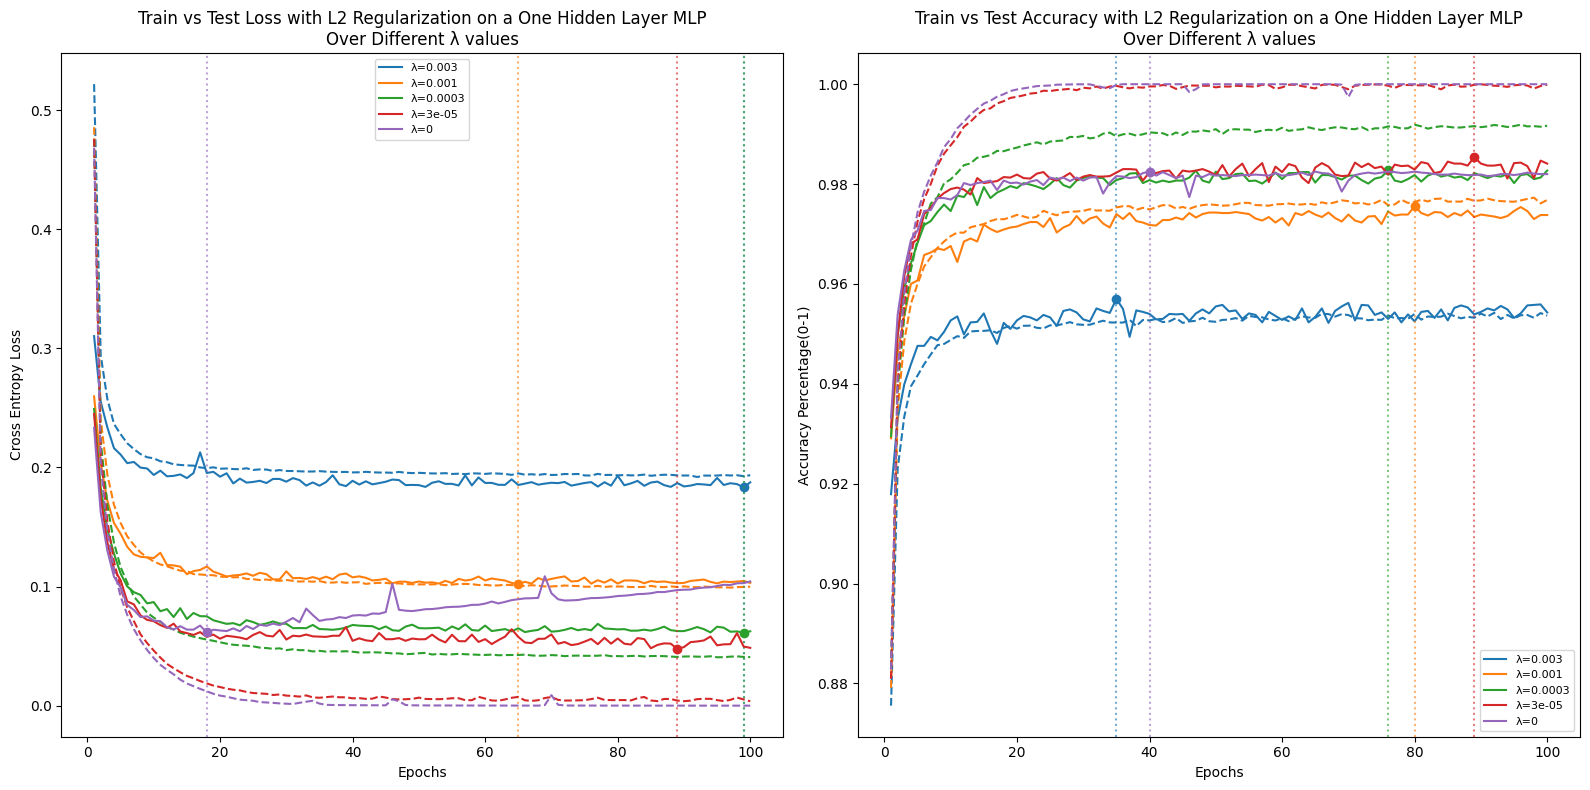

{0.003: (0.18321191653609276, 99, 0.957, 35), 0.001: (0.10213454242795705, 65, 0.9756, 80), 0.0003: (0.06127635181415826, 99, 0.9828, 76), 3e-05: (0.04753692542173667, 89, 0.9854, 89), 0: (0.061485519200796264, 18, 0.9825, 40)}


In [ ]:
def loop_loss_reg(model,lr,lambda_l2,nb_epochs):
    my_model = model.to(device)
    return my_model.train_loop_reg(lr,lambda_l2,nb_epochs)

lambdas = [3e-3,1e-3,3e-4,3e-5,0]
lambdas_dict = {}
summary = {}
lr = 5e-4
epochs = 100

for l in lambdas:
    tr_loss, tr_acc, test_loss, test_acc = loop_loss_reg(Shallow_MLP_reg(784,512,10),lr=lr,lambda_l2=l,nb_epochs=epochs)
    lambdas_dict[l] = (tr_loss,tr_acc,test_loss,test_acc)
    min_loss = min(test_loss)
    epoch_min_loss = test_loss.index(min_loss) + 1
    max_acc = max(test_acc)
    epoch_max_acc = test_acc.index(max_acc) + 1
    summary[l] = (min_loss,epoch_min_loss,max_acc,epoch_max_acc)

cmap = plt.get_cmap("tab10")                
colors = {l: cmap(i) for i, l in enumerate(lambdas)} 
fig,axes = plt.subplots(1,2,figsize=(16,8))
ax = axes[0]
for l in lambdas:
    tr_loss = lambdas_dict[l][0]
    test_loss = lambdas_dict[l][2]
    color = colors[l]
    ax.plot(range(1,len(tr_loss)+1),tr_loss,linestyle ="--" , color=color,label = "_nolegend_")
    ax.plot(range(1,len(test_loss)+1),test_loss,linestyle = "-", color = color, label = f"λ={l}")
    ax.plot(summary[l][1], summary[l][0], marker = "o", color=color, label = "_nolegend_")
    ax.axvline(summary[l][1], color = color, linestyle = ":", alpha = 0.6)
ax.set_title("Train vs Test Loss with L2 Regularization on a One Hidden Layer MLP\nOver Different λ values")
ax.set_xlabel("Epochs")
ax.set_ylabel("Cross Entropy Loss")
ax.legend(fontsize = 8)
ax = axes[1]
for l in lambdas:
    tr_acc = lambdas_dict[l][1]
    test_acc = lambdas_dict[l][-1]
    color = colors[l]
    ax.plot(range(1,len(tr_acc)+1),tr_acc,linestyle = "--", color=color, label = "_nolegend_")
    ax.plot(range(1,len(test_acc)+1),test_acc, linestyle = "-",color = color, label = f"λ={l}")
    ax.plot(summary[l][-1],summary[l][-2], marker = "o", color=color, label = "_nolegend_")
    ax.axvline(summary[l][-1], color = color, linestyle=":", alpha = 0.6)
ax.set_title("Train vs Test Accuracy with L2 Regularization on a One Hidden Layer MLP\nOver Different λ values")
ax.set_xlabel("Epochs")
ax.set_ylabel("Accuracy Percentage(0-1)")
ax.legend(fontsize=8)
plt.tight_layout()
plt.show()

print(summary)

# Per Class Accuracy Over Epochs

In [31]:
class Best_Shallow_MLP_reg(nn.Module):
    def __init__(self,in_dim=784,hid_dim=512,out_dim=10):
        super().__init__()
        self.layer1 = nn.Linear(in_dim,hid_dim)
        self.layer2 = nn.Linear(hid_dim,out_dim)
        self.relu = nn.ReLU()

    def forward(self,x):
        x = self.relu(self.layer1(x))
        x = self.layer2(x)
        return x
    
    def train_loop(self,lr,lambda_l2,nb_epochs):
        optimizer = optim.Adam(self.parameters(), lr=lr)
        criterion = nn.CrossEntropyLoss()
        epochs = 0
        correct = {i:0 for i in range(10)}
        total = {i:0 for i in range(10)}
        digits = {i:[] for i in range(10)}
        while epochs < nb_epochs:
            self.train()
            for x,y in train_loader: 
                x = x.view(x.size(0),-1).to(device)
                y = y.to(device)
                optimizer.zero_grad()
                tr_out = self(x)
                ce = criterion(tr_out,y)
                l2 = (self.layer1.weight**2).sum() + (self.layer2.weight**2).sum()
                tr_loss = ce + lambda_l2 * l2
                tr_loss.backward()
                optimizer.step()

            self.eval()
            with torch.no_grad():
                for x,y in test_loader:
                    x=x.view(x.size(0),-1).to(device)
                    y=y.to(device)
                    test_out = self(x)
                    
                    preds = torch.argmax(test_out,dim=1)
                    for c in range(10):
                        correct[c] += ((preds == c) & (y==c)).sum().item()
                        total[c] += (y==c).sum().item()
                for i in range(10):
                    digits[i].append(correct[i]/total[i])
                    correct[i], total[i] = 0, 0
            epochs +=1

        return digits

In [40]:
m1 = Best_Shallow_MLP_reg(784,512,10).to(device)
acc_per_class = m1.train_loop(5e-4,3e-5,100)

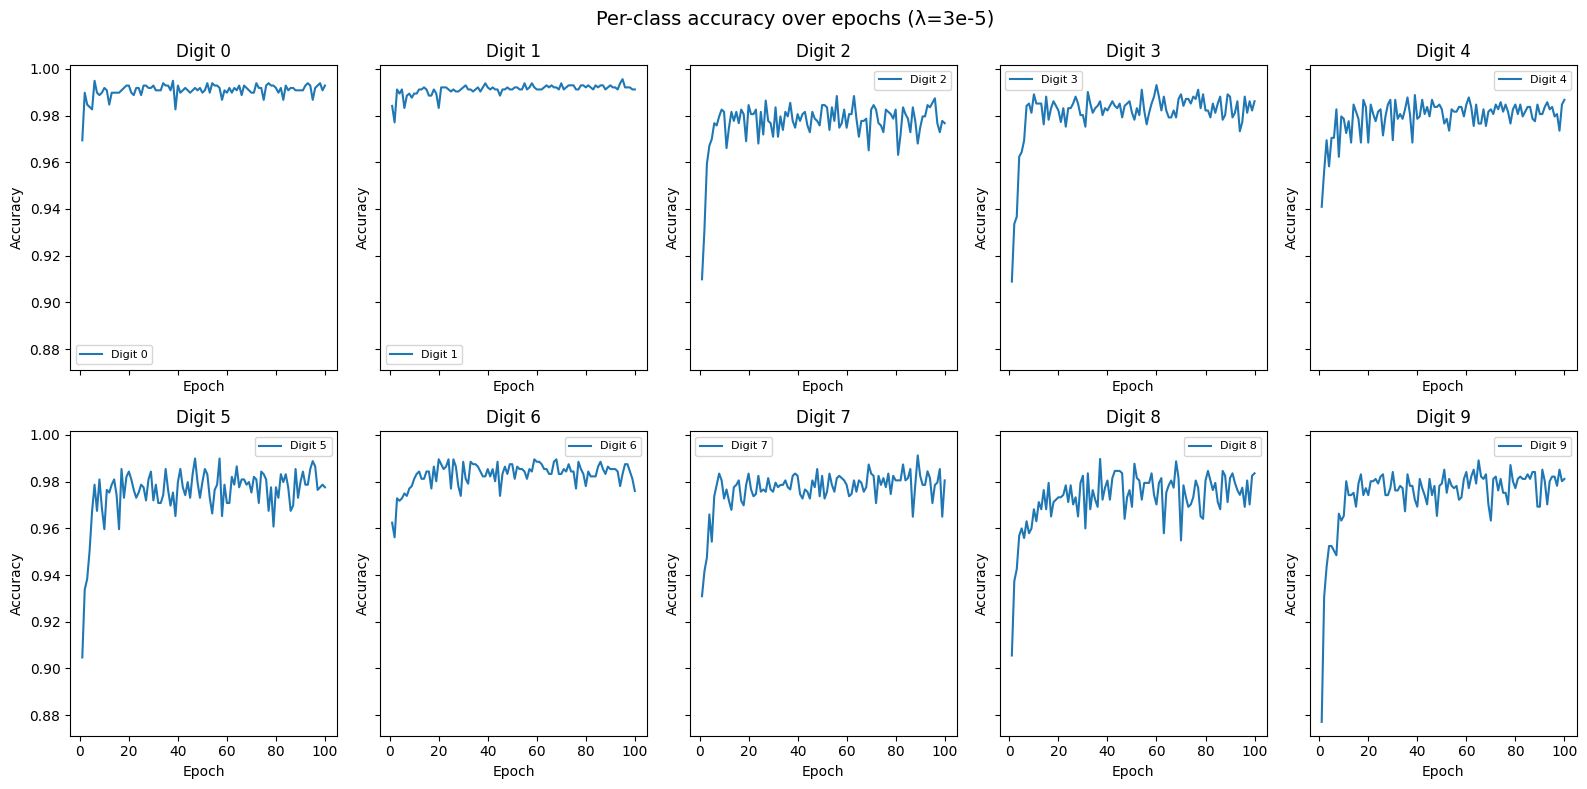

In [41]:
fig, axes = plt.subplots(2,5,figsize = (16,8),sharex=True,sharey=True)
for i in range(2):
    for j in range(5):
        k = i*5 + j
        ax = axes[i,j]
        ax.plot(range(1,len(acc_per_class[k])+1),acc_per_class[k],label = f"Digit {k}")

        ax.set_title(f"Digit {k}")
        ax.set_xlabel("Epoch")
        ax.set_ylabel("Accuracy")
        ax.legend(fontsize = 8)

fig.suptitle("Per-class accuracy over epochs (λ=3e-5)", fontsize = 14)
plt.tight_layout()
plt.show()